## ***Advanced Deep Learning Project***

DESCRIPTION

Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0
Prerequisites:
Keras
Scikit Learn
Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%

# [Importing necessary libraries](https://)

In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import get_custom_objects
from keras.layers.noise import AlphaDropout

In [ ]:
#!pip install npzviewer

#from google.colab import drive
#drive.mount('/content/drive')

     |████████████████████████████████| 8.3 MB 4.1 MB/s 
     |████████████████████████████████| 59.9 MB 38 kB/s 
     |████████████████████████████████| 317 kB 52.5 MB/s 
  Created wheel for npzviewer: filename=npzviewer-0.2.0-py3-none-any.whl size=5606 sha256=e3be685de3e9c155485b5f999bd1106d6ade284f0b45bf29fbfd1209c69b355b
  Stored in directory: /root/.cache/pip/wheels/ec/c1/cb/18da8fc84b4abdf27989b720679f154a2582de6ab948b5d8a4
Successfully built npzviewer
Mounted at /content/drive


In [ ]:
#Loading the data
data=np.load('/content/drive/MyDrive/ORL_faces.npz')

In [ ]:
print(data.files)

['testY', 'testX', 'trainX', 'trainY']


In [ ]:
#splitting data into Train and Test sets
for i in data:
  TrainX=data['trainX']
  TrainY=data['trainY']
  TestX=data['testX']
  TestY=data['testY']


In [ ]:
#Normalizing every image
TrainX = TrainX.astype(np.float32) / 255.0
TestX = TestX.astype(np.float32) / 255.0

In [ ]:
TrainX[0]

array([0.1882353 , 0.19215687, 0.1764706 , ..., 0.18431373, 0.18039216,
       0.18039216], dtype=float32)

## Splitting the dataset into train and validation sets

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(TrainX,TrainY,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(192, 10304)

In [ ]:
y_train.shape

(192,)

In [ ]:
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [ ]:
#Reshaping the train,validation and test sets
xtrain=x_train.reshape(x_train.shape[0],*image_shape)
xvalid=x_valid.reshape(x_valid.shape[0],*image_shape)
xtest=TestX.reshape(TestX.shape[0],*image_shape)

In [ ]:
xtrain.shape

(192, 112, 92, 1)

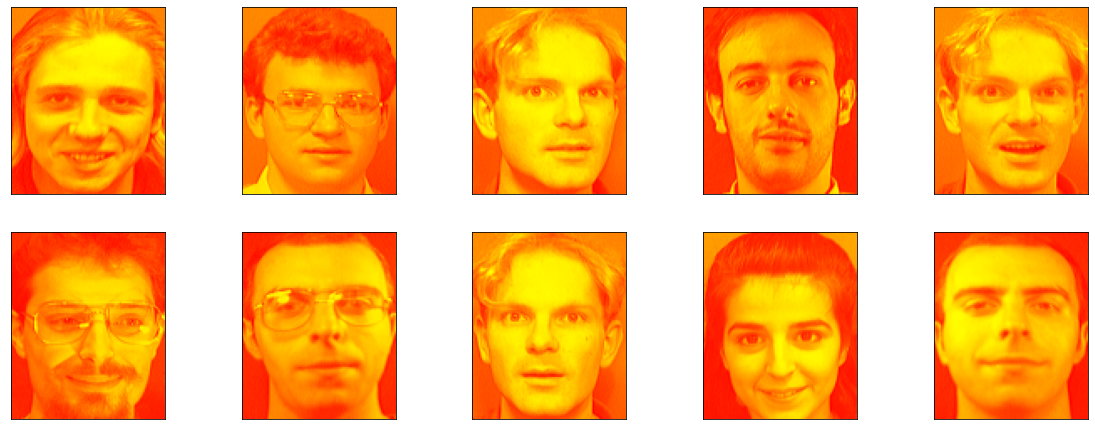

In [ ]:
#Plotting images
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(xtrain[i]), cmap=plt.cm.autumn) # for gray scale
plt.show()

# Creating CNN Model Architecture 

In [ ]:
def cnn_model(activation,
              dropout_rate,
              optimizer):
    
        model = Sequential() #initialize Sequential model
        model.add(Conv2D(32, kernel_size=3,
                  activation=activation,
                  input_shape=image_shape)) #32 filter with kernel size of 3 x 3 with input shape
        model.add(MaxPooling2D(pool_size=2)) 
        
        model.add(Conv2D(64,3, activation=activation)) #64 filter with kernel size of 3 x 3
        model.add(MaxPooling2D(pool_size=2)) #Max pool with size of 2
        
        model.add(Flatten())
        
        model.add(Dense(2024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(1024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(512, activation=activation))
        model.add(Dropout(0.5))
        
        model.add(Dense(20, activation='softmax')) #Output layer
    
        model.compile(
        loss='sparse_categorical_crossentropy', 
        optimizer=optimizer, 
        metrics=['accuracy']
        ) 
    
        return model

In [ ]:
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))}) 

# Defining the type of activation functions to be tested
activation_function = 'leaky-relu'

## Training CNN Model

In [ ]:
model = cnn_model(activation=activation_function,
                      dropout_rate=0.2,
                      optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5
    
history = model.fit(np.array(xtrain), np.array(y_train), 
                        batch_size=512,
                        epochs=75, 
                        verbose=2,
                        validation_data=(np.array(xvalid),np.array(y_valid)))

Epoch 1/75
1/1 - 31s - loss: 2.9986 - accuracy: 0.0365 - val_loss: 3.4119 - val_accuracy: 0.0208
Epoch 2/75
1/1 - 0s - loss: 4.4152 - accuracy: 0.0625 - val_loss: 3.2728 - val_accuracy: 0.0625
Epoch 3/75
1/1 - 0s - loss: 4.5903 - accuracy: 0.0729 - val_loss: 2.9641 - val_accuracy: 0.1042
Epoch 4/75
1/1 - 0s - loss: 3.2919 - accuracy: 0.0990 - val_loss: 2.9826 - val_accuracy: 0.0417
Epoch 5/75
1/1 - 0s - loss: 2.9473 - accuracy: 0.0833 - val_loss: 2.9077 - val_accuracy: 0.0625
Epoch 6/75
1/1 - 0s - loss: 2.8311 - accuracy: 0.2031 - val_loss: 3.0092 - val_accuracy: 0.1250
Epoch 7/75
1/1 - 0s - loss: 3.9669 - accuracy: 0.0729 - val_loss: 2.9206 - val_accuracy: 0.0833
Epoch 8/75
1/1 - 0s - loss: 2.8985 - accuracy: 0.1354 - val_loss: 2.9288 - val_accuracy: 0.0208
Epoch 9/75
1/1 - 0s - loss: 2.7746 - accuracy: 0.1354 - val_loss: 2.8391 - val_accuracy: 0.0625
Epoch 10/75
1/1 - 0s - loss: 2.8179 - accuracy: 0.1042 - val_loss: 2.7687 - val_accuracy: 0.2500
Epoch 11/75
1/1 - 0s - loss: 2.7356 - 

## Evaluating the CNN model

In [ ]:
result_score = model.evaluate(np.array(xtest),np.array(TestY),verbose=0)

print('Test Loss {:.4f}'.format(result_score[0]))
print('Test Accuracy {:.4f}'.format(result_score[1]))

Test Loss 0.2737
Test Accuracy 0.9500


In [ ]:
result_score

[0.27368250489234924, 0.949999988079071]

## Plotting the graph of Training loss vs Validation loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


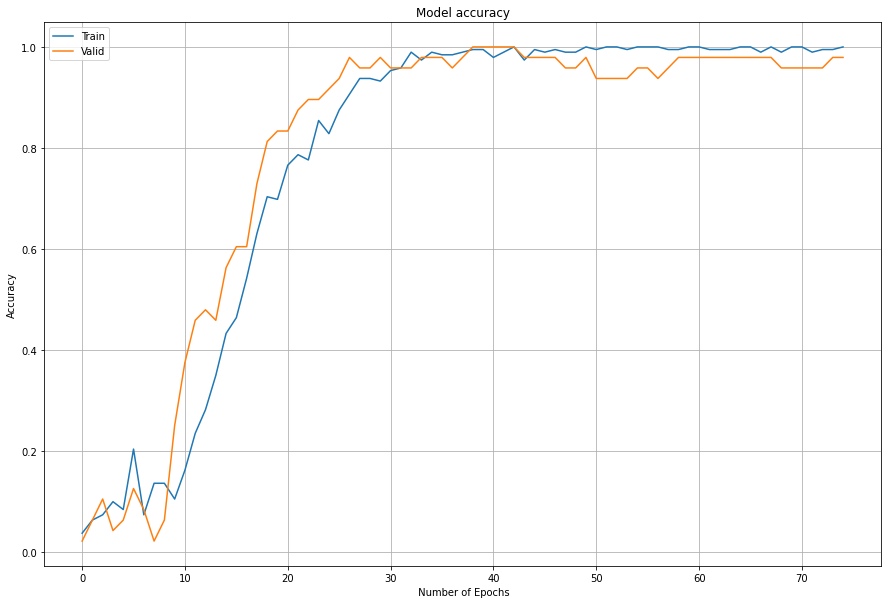

In [ ]:
print(history.history.keys())

# Plotting Accuracy for final model
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel(' Number of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

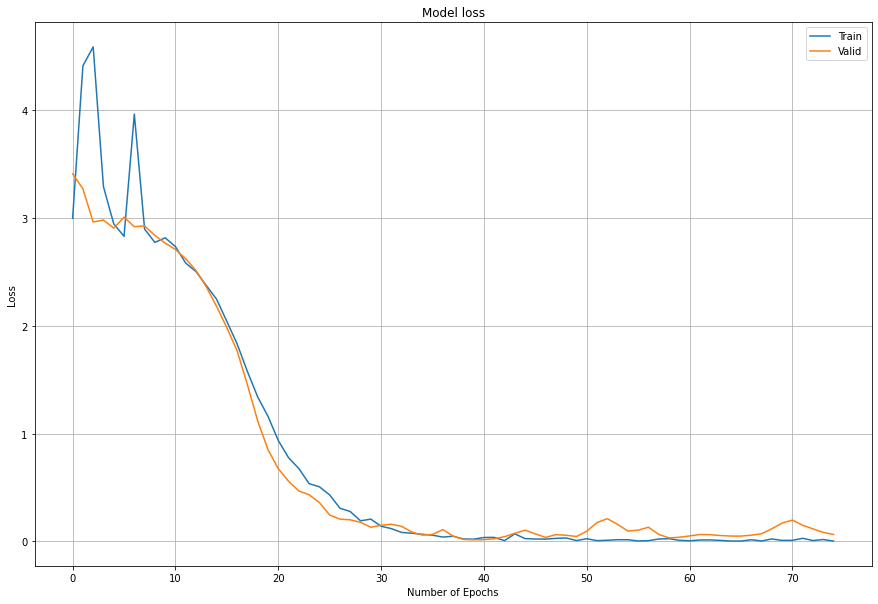

In [ ]:
# Plotting Loss for Final Model
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

# Observation

The training loss fluctuated at the starting of training andas the epochs increases the training loss started decreasing and became almost constant after 40 epochs 

The validation loss started decreasing from the start and decreased at a same pace as the training loss and became almost constant with small fluctuations

This shows that the model is neither underfitting nor overfitting and the model we got is good model which  can generalise better  

## Conclusion

In this project we analyzed ORL face images. we built a CNN model using con2d layers,Maxpooling layer,Fully connected layer and output layer which returns a one-hot-encoding matrix with probabilities of each image.

The CNN model is trained and validated using adam optimizer, relu activation function and has achieved a validation accuracy of 97.92 after 30 epochs.

The CNN model has achieved a accuracy of 95% and test loss of 0.2737 on test data after training the model for 75 epochs.

#                                                                                                                      Thank you